<a href="https://colab.research.google.com/github/khuloodmuzaffar/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the CIFAR-10 project for object recognition in images.
It is a multi-class classification problem, which we will solve using Convolutional Neural Network (CNN).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential, load_model

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
print(f"y_train: {y_train}")
print(f"y_test: {y_test}")

y_train: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_test: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
print(f"y_train: {y_train}")
print(f"y_test: {y_test}")

y_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [ ]:
def summarize_diagnostics(history):
  plt.subplot(211)
  # plot loss
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

  plt.show()

In [ ]:
baseline_model_1 = Sequential()
baseline_model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
baseline_model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_1.add(MaxPooling2D((2, 2)))
baseline_model_1.add(Flatten())
baseline_model_1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
baseline_model_1.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
baseline_model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = baseline_model_1.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

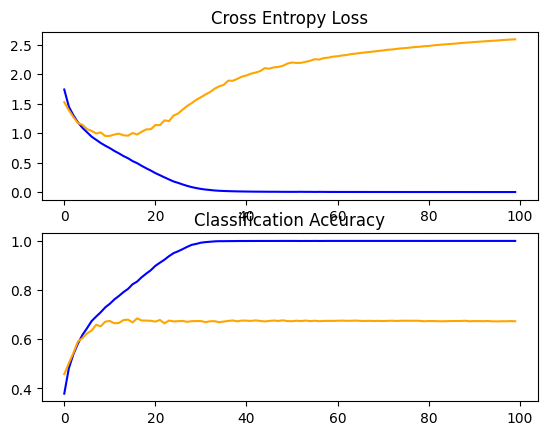

In [ ]:
summarize_diagnostics(history)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
_, accuracy = baseline_model_1.evaluate(X_test, y_test, verbose=0)

In [ ]:
_

2.5917916297912598

In [ ]:
accuracy

0.67330002784729

In [ ]:
print('> %.3f' % (accuracy * 100.0))

> 67.330


In [ ]:
baseline_model_2 = Sequential()
baseline_model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
baseline_model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_2.add(MaxPooling2D((2, 2)))
baseline_model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_2.add(MaxPooling2D((2, 2)))
baseline_model_2.add(Flatten())
baseline_model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
baseline_model_2.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
baseline_model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = baseline_model_2.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

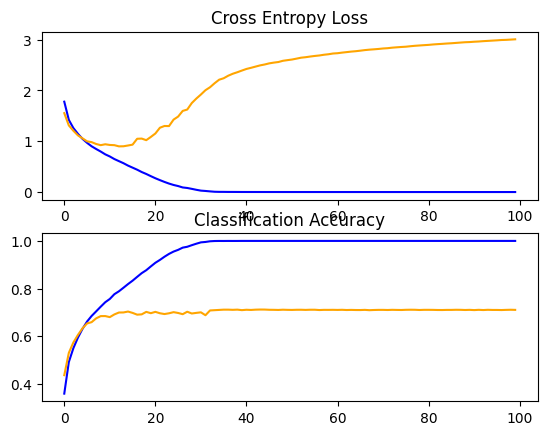

In [ ]:
summarize_diagnostics(history)

In [ ]:
_, accuracy = baseline_model_2.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('> %.3f' % (accuracy * 100.0))

> 71.040


In [ ]:
baseline_model_3 = Sequential()
baseline_model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
baseline_model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_3.add(MaxPooling2D((2, 2)))
baseline_model_3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_3.add(MaxPooling2D((2, 2)))
baseline_model_3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
baseline_model_3.add(MaxPooling2D((2, 2)))
baseline_model_3.add(Flatten())
baseline_model_3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
baseline_model_3.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
baseline_model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = baseline_model_3.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [ ]:
_, accuracy = baseline_model_3.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('> %.3f  ' % (accuracy * 100.0))

> 72.660  


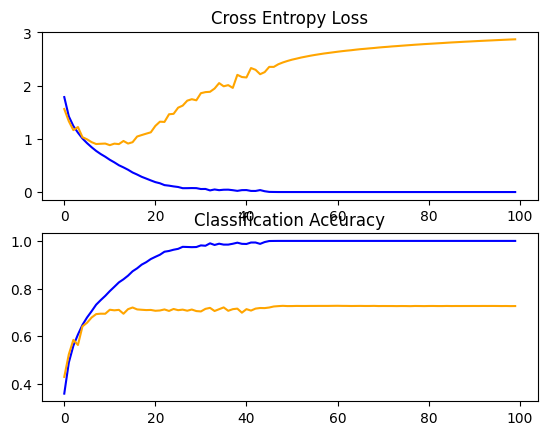

In [ ]:
summarize_diagnostics(history)

# Addressing Overfitting with ***regularization*** and ***data augmentation***



## Regularization



1.   Dropout Regularization



In [ ]:
# Dropout
model_w_dropout = Sequential()
model_w_dropout.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_w_dropout.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dropout.add(MaxPooling2D((2, 2)))
model_w_dropout.add(Dropout(0.2))
model_w_dropout.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dropout.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dropout.add(MaxPooling2D((2, 2)))
model_w_dropout.add(Dropout(0.2))
model_w_dropout.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dropout.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dropout.add(MaxPooling2D((2, 2)))
model_w_dropout.add(Dropout(0.2))
model_w_dropout.add(Flatten())
model_w_dropout.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_w_dropout.add(Dropout(0.2))
model_w_dropout.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_w_dropout.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_w_dropout.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [ ]:
_, accuracy = model_w_dropout.evaluate(X_test, y_test)
print('> %.3f' % (accuracy * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.6098 - accuracy: 0.8220
> 82.200


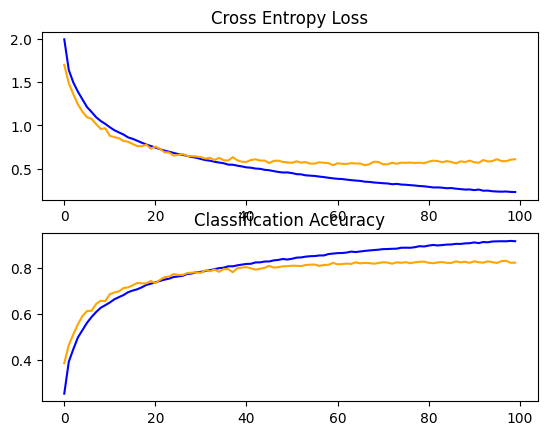

In [ ]:
summarize_diagnostics(history)



2.   Weight Regularization aka Weight Decay



In [ ]:
model_w_weight_decay = Sequential()
model_w_weight_decay.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model_w_weight_decay.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(MaxPooling2D((2, 2)))
model_w_weight_decay.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(MaxPooling2D((2, 2)))
model_w_weight_decay.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(MaxPooling2D((2, 2)))
model_w_weight_decay.add(Flatten())
model_w_weight_decay.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model_w_weight_decay.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_w_weight_decay.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_w_weight_decay.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [ ]:
_, accuracy = model_w_weight_decay.evaluate(X_test, y_test)
print('> %.3f' % (accuracy * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 1.5042 - accuracy: 0.7627
> 76.270


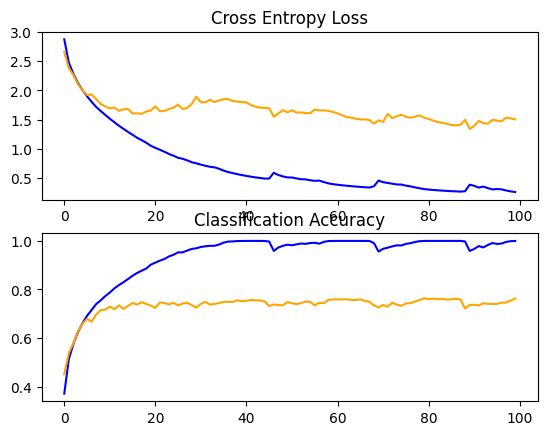

In [ ]:
summarize_diagnostics(history)

## Data Augmentation

In [ ]:
model_w_aug = Sequential()
model_w_aug.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_w_aug.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_aug.add(MaxPooling2D((2, 2)))
model_w_aug.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_aug.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_aug.add(MaxPooling2D((2, 2)))
model_w_aug.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_aug.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_aug.add(MaxPooling2D((2, 2)))
model_w_aug.add(Flatten())
model_w_aug.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_w_aug.add(Dense(10, activation='softmax'))

optimizer=SGD(learning_rate=0.001, momentum=0.9)
model_w_aug.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [ ]:
steps = int(X_train.shape[0] / 64)
history = model_w_aug.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [ ]:
_, accuracy = model_w_aug.evaluate(X_test, y_test)
print('> %.3f' % (accuracy * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.5781 - accuracy: 0.8310
> 83.100


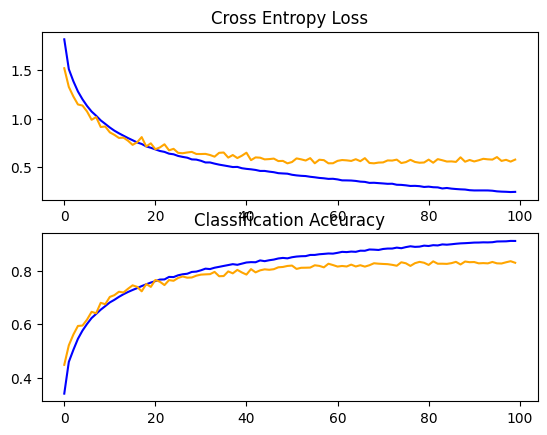

In [ ]:
summarize_diagnostics(history)

### Variation of Dropout Regularization (Increasing Dropout)

In [ ]:
inc_dropout_model = Sequential()
inc_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
inc_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
inc_dropout_model.add(MaxPooling2D((2, 2)))
inc_dropout_model.add(Dropout(0.2))
inc_dropout_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
inc_dropout_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
inc_dropout_model.add(MaxPooling2D((2, 2)))
inc_dropout_model.add(Dropout(0.3))
inc_dropout_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
inc_dropout_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
inc_dropout_model.add(MaxPooling2D((2, 2)))
inc_dropout_model.add(Dropout(0.4))
inc_dropout_model.add(Flatten())
inc_dropout_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
inc_dropout_model.add(Dropout(0.5))
inc_dropout_model.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
inc_dropout_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = inc_dropout_model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), verbose=0)

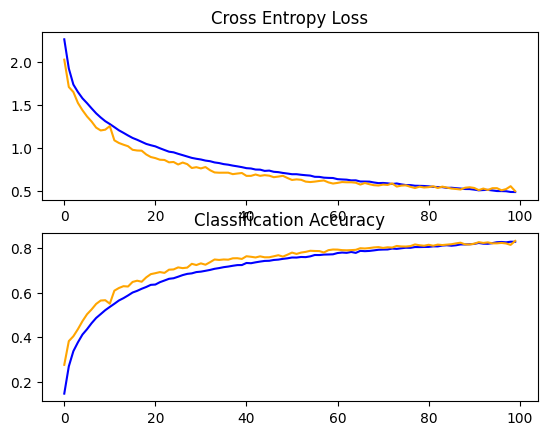

In [ ]:
summarize_diagnostics(history)

In [ ]:
_, accuracy = inc_dropout_model.evaluate(X_test, y_test)
print('> %.3f' % (accuracy * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.8323
> 83.230


### Dropout & Data Augmentation






In [ ]:
model_w_dda = Sequential()
model_w_dda.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_w_dda.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dda.add(MaxPooling2D((2, 2)))
model_w_dda.add(Dropout(0.2))
model_w_dda.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dda.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dda.add(MaxPooling2D((2, 2)))
model_w_dda.add(Dropout(0.2))
model_w_dda.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dda.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_dda.add(MaxPooling2D((2, 2)))
model_w_dda.add(Dropout(0.2))
model_w_dda.add(Flatten())
model_w_dda.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_w_dda.add(Dropout(0.2))
model_w_dda.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_w_dda.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [ ]:
steps = int(X_train.shape[0] / 64)
history = model_w_dda.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(X_test, y_test), verbose=0)

313/313 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.8602


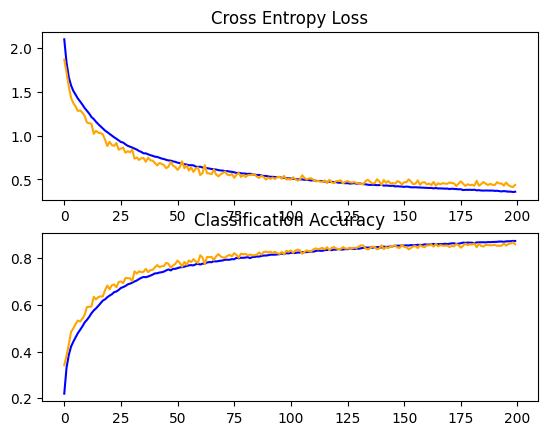

> 86.020


In [ ]:
_, accuracy = model_w_dda.evaluate(X_test, y_test)
summarize_diagnostics(history)
print('> %.3f' % (accuracy * 100.0))

### Dropout & Data Augmentation & Batch Normalization

In [ ]:
model_w_ddabn = Sequential()
model_w_ddabn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(MaxPooling2D((2, 2)))
model_w_ddabn.add(Dropout(0.2))
model_w_ddabn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(MaxPooling2D((2, 2)))
model_w_ddabn.add(Dropout(0.3))
model_w_ddabn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(MaxPooling2D((2, 2)))
model_w_ddabn.add(Dropout(0.4))
model_w_ddabn.add(Flatten())
model_w_ddabn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_w_ddabn.add(BatchNormalization())
model_w_ddabn.add(Dropout(0.5))
model_w_ddabn.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_w_ddabn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=64)

steps = int(X_train.shape[0] / 64)
history = model_w_ddabn.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(X_test, y_test), verbose=0)

_, accuracy = model_w_ddabn.evaluate(X_test, y_test)
summarize_diagnostics(history)
print('> %.3f' % (accuracy * 100.0))

## Save Final Model

In [ ]:
model_w_ddabn.save('final_model.h5')

NameError: ignored

## Evaluate Final Model

In [ ]:
model = load_model('final_model.h5')
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (accuracy * 100.0))

## Make Prediction